# Average House Sale Prices forecast in New London

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('New London.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,187074.96,236506.76,New London
1,2001-02-01,205326.17,247620.67,New London
2,2001-03-01,194679.63,239516.02,New London
3,2001-04-01,210649.44,244959.93,New London
4,2001-05-01,197721.50,242496.98,New London


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,187074.96,236506.76
1,2001-02-01,205326.17,247620.67
2,2001-03-01,194679.63,239516.02
3,2001-04-01,210649.44,244959.93
4,2001-05-01,197721.50,242496.98


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [34]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [35]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,236506.76
1,2001-02-01,247620.67
2,2001-03-01,239516.02
3,2001-04-01,244959.93
4,2001-05-01,242496.98


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
average_data.columns=['ds','y']

In [37]:
average_data

,ds,y
0,2001-01-01,236506.76
1,2001-02-01,247620.67
2,2001-03-01,239516.02
3,2001-04-01,244959.93
4,2001-05-01,242496.98
...,...,...
245,2021-06-01,311439.43
246,2021-07-01,325331.67
247,2021-08-01,338057.40
248,2021-09-01,309011.73


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,324993.157882,298559.064063,351915.472835
270,2023-06-30,357305.917446,331482.611000,384338.877552
271,2023-07-31,342599.376698,315265.034614,371145.089687
272,2023-08-31,332421.103844,305303.147076,359675.331403
273,2023-09-30,298400.324477,269784.690036,326781.452252


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,240578.699120,188834.140436,242576.250270,240578.699120,240578.699120,-23859.632220,-23859.632220,-23859.632220,-23859.632220,-23859.632220,-23859.632220,0.0,0.0,0.0,216719.066900
1,2001-02-01,242794.284869,209470.266945,261589.913756,242794.284869,242794.284869,-7888.648887,-7888.648887,-7888.648887,-7888.648887,-7888.648887,-7888.648887,0.0,0.0,0.0,234905.635982
2,2001-03-01,244795.459094,206408.804027,258375.242595,244795.459094,244795.459094,-12156.480658,-12156.480658,-12156.480658,-12156.480658,-12156.480658,-12156.480658,0.0,0.0,0.0,232638.978436
3,2001-04-01,247011.044843,212811.656022,267897.570886,247011.044843,247011.044843,-5339.610508,-5339.610508,-5339.610508,-5339.610508,-5339.610508,-5339.610508,0.0,0.0,0.0,241671.434335
4,2001-05-01,249155.160084,227856.025437,280638.669049,249155.160084,249155.160084,6335.424769,6335.424769,6335.424769,6335.424769,6335.424769,6335.424769,0.0,0.0,0.0,255490.584853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,319381.502856,298559.064063,351915.472835,313402.736929,324819.709326,5611.655027,5611.655027,5611.655027,5611.655027,5611.655027,5611.655027,0.0,0.0,0.0,324993.157882
270,2023-06-30,320383.947502,331482.611000,384338.877552,313862.430627,326226.453720,36921.969943,36921.969943,36921.969943,36921.969943,36921.969943,36921.969943,0.0,0.0,0.0,357305.917446
271,2023-07-31,321419.806971,315265.034614,371145.089687,314210.951182,328059.446745,21179.569728,21179.569728,21179.569728,21179.569728,21179.569728,21179.569728,0.0,0.0,0.0,342599.376698
272,2023-08-31,322455.666439,305303.147076,359675.331403,314652.034019,329690.764681,9965.437404,9965.437404,9965.437404,9965.437404,9965.437404,9965.437404,0.0,0.0,0.0,332421.103844


## Plotting the forecast data

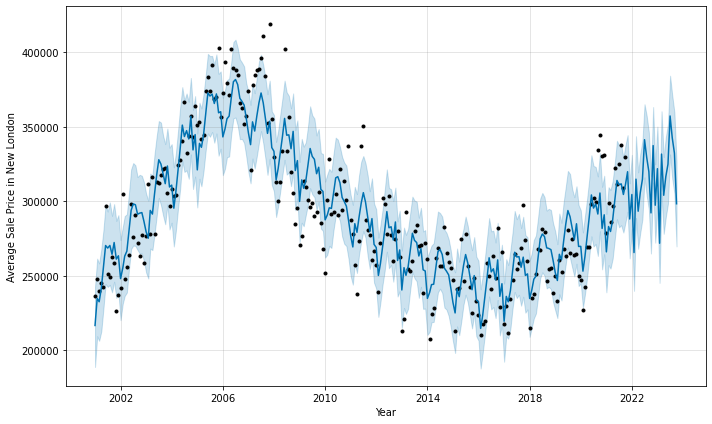

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

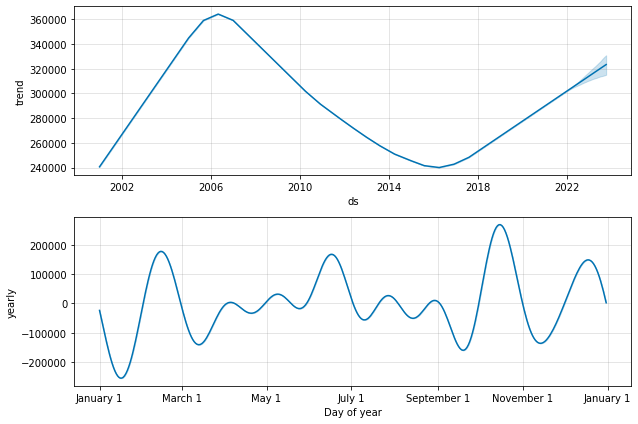

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,1.043732e+09,32306.846494,23789.063944,0.079025,0.050689,0.079860,0.636364
1,40 days,1.190335e+09,34501.238750,25762.717416,0.085169,0.056486,0.086805,0.590909
2,42 days,1.194795e+09,34565.807574,25926.761201,0.085903,0.059934,0.087577,0.590909
3,44 days,1.102464e+09,33203.370200,24453.263164,0.081028,0.056486,0.082193,0.625000
4,45 days,1.061721e+09,32584.063291,24527.086330,0.081707,0.059934,0.082605,0.590909


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.92097460854255%
Horizon: 40 days 00:00:00, Accuracy: 99.91483110952846%
Horizon: 42 days 00:00:00, Accuracy: 99.91409676411786%
Horizon: 44 days 00:00:00, Accuracy: 99.91897160175824%
Horizon: 45 days 00:00:00, Accuracy: 99.91829297697402%
Horizon: 46 days 00:00:00, Accuracy: 99.91837319308327%
Horizon: 47 days 00:00:00, Accuracy: 99.91971527253594%
Horizon: 49 days 00:00:00, Accuracy: 99.9157163315283%
Horizon: 50 days 00:00:00, Accuracy: 99.9137649940632%
Horizon: 51 days 00:00:00, Accuracy: 99.91640286787677%
Horizon: 52 days 00:00:00, Accuracy: 99.91814945974649%
Horizon: 54 days 00:00:00, Accuracy: 99.91557902893551%
Horizon: 55 days 00:00:00, Accuracy: 99.91316125707988%
Horizon: 56 days 00:00:00, Accuracy: 99.91476288712964%
Horizon: 58 days 00:00:00, Accuracy: 99.91465169688448%
Horizon: 60 days 00:00:00, Accuracy: 99.9127942445388%
Horizon: 61 days 00:00:00, Accuracy: 99.90855391255516%
Horizon: 62 days 00:00:00, Accuracy: 99.91296953924

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

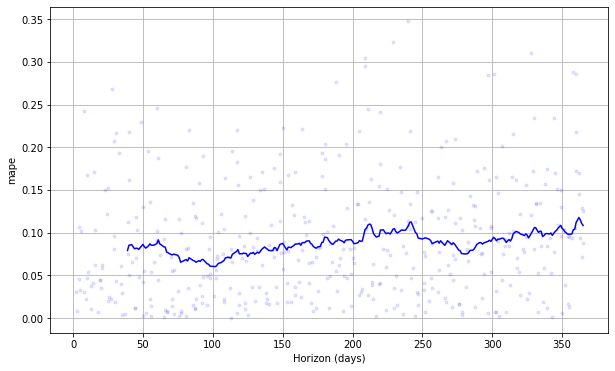

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 100-105.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)